In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mydata = pd.read_csv('Online_retail.csv').drop('sno.', axis=1)

In [3]:
mydata.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8.26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8.26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 8.26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 8.26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 8.28,1.85,17850.0,United Kingdom
8,536366,22632,DOORMAT NEW ENGLAND,6,01-12-2010 8.28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 8.34,1.69,13047.0,United Kingdom


In [4]:
mydata.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
mydata.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4216,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31-10-2011 14.41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [6]:
max_id = mydata['CustomerID'].max()
max_id

18287.0

In [7]:
mydata['CustomerID'] = mydata['CustomerID'].interpolate(method='linear')

In [8]:
mydata['Description'] = mydata['Description'].fillna('Unknown')

In [9]:
# Step 1: Find the indexes to drop
# indexes_to_drop = mydata[mydata['Description'] == 'unknown'].index

# Step 2: Drop the rows with the found indexes
# df_cleaned = mydata.drop(indexes_to_drop)

In [10]:
mydata.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
mydata['Description'].value_counts().get('Unknown', 0)

1454

In [12]:
(mydata['Description'] == 'Unknown').sum()

1454

In [13]:
mydata['total_revenue'] = mydata['UnitPrice'] * mydata['Quantity']

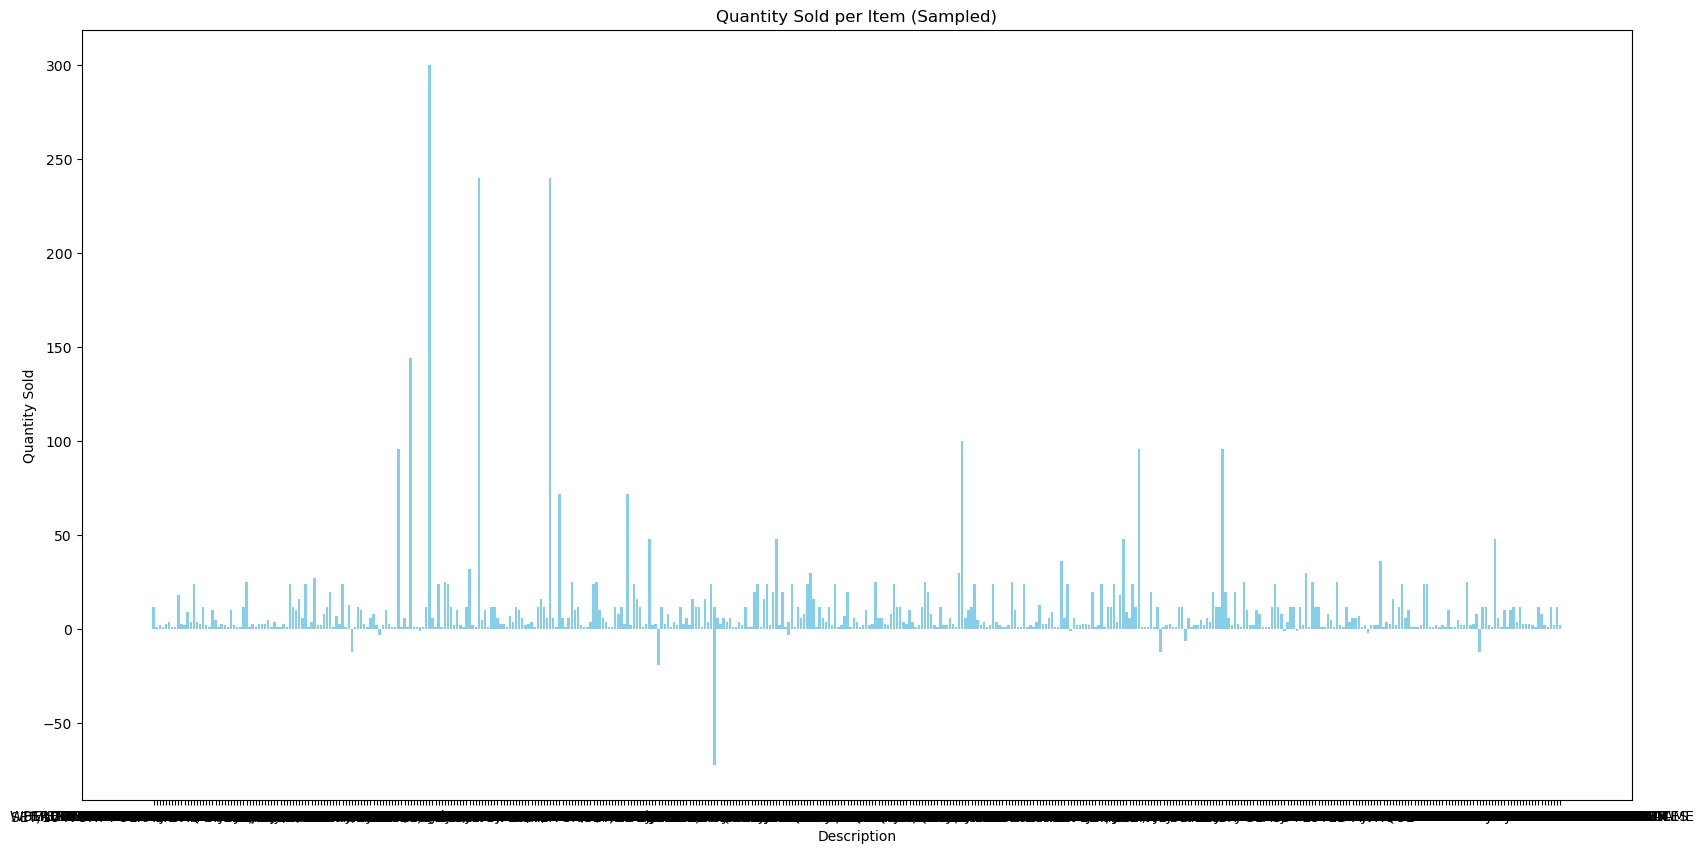

In [14]:
# Downsample the data (e.g., take every 1000th row)
sampled_data = mydata.iloc[::1000, :]

plt.figure(figsize=(20, 10))
plt.bar(sampled_data['Description'], sampled_data['Quantity'], color='skyblue')
plt.xlabel('Description')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Item (Sampled)')
plt.show()

In [15]:
mydata['Description'] = mydata['Description'].str.title().str.strip()

aggregated_data = mydata.groupby('Description', as_index=False)['Quantity'].sum()

top_items = aggregated_data.nlargest(10, 'Quantity')
worst_items = aggregated_data.nsmallest(10, 'Quantity')

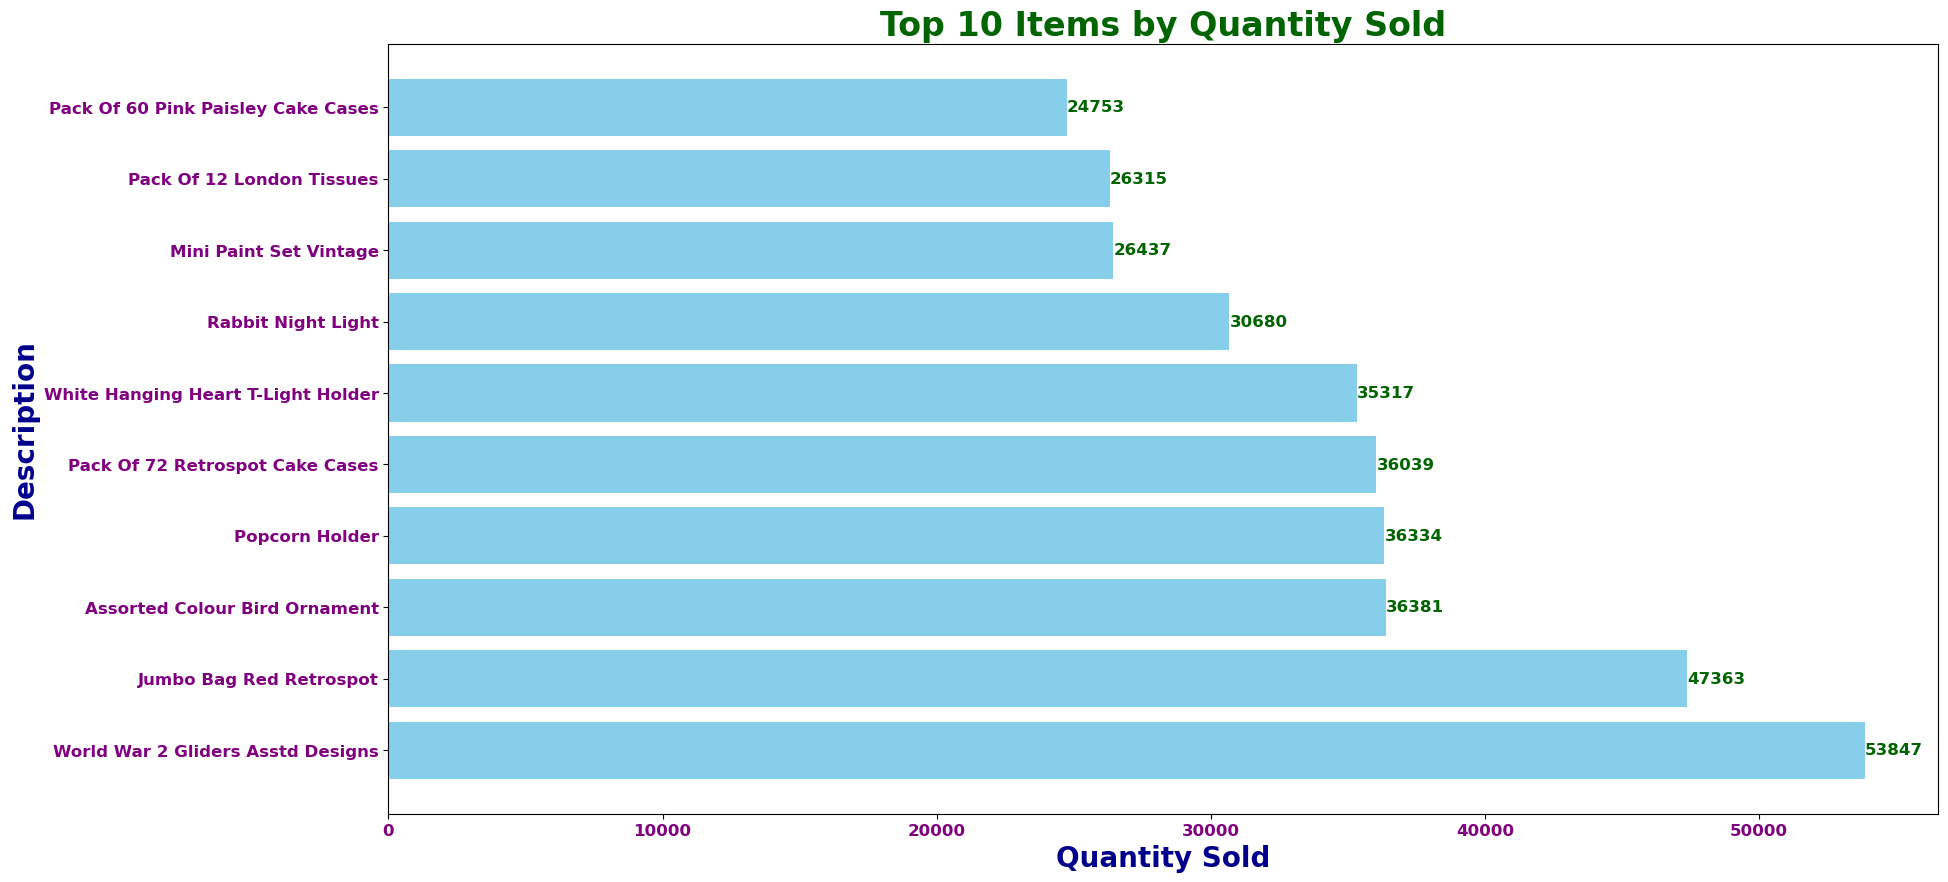

In [16]:
plt.figure(figsize=(20, 10))
bars = plt.barh(top_items['Description'], top_items['Quantity'], color='skyblue')

plt.xlabel('Quantity Sold', fontsize=20, fontweight='bold', color='darkblue')
plt.ylabel('Description', fontsize=20, fontweight='bold', color='darkblue')
plt.title('Top 10 Items by Quantity Sold', fontsize=24, fontweight='bold', color='darkgreen')

plt.xticks(fontsize=12, fontweight='bold', color='purple')

plt.yticks(fontsize=12, fontweight='bold', color='purple')

for bar in bars:
    yval = bar.get_width()
    plt.text(yval, bar.get_y() + bar.get_height()/2.0, int(yval), va='center', ha='left', fontsize=12, fontweight='bold', color='darkgreen')

plt.show()

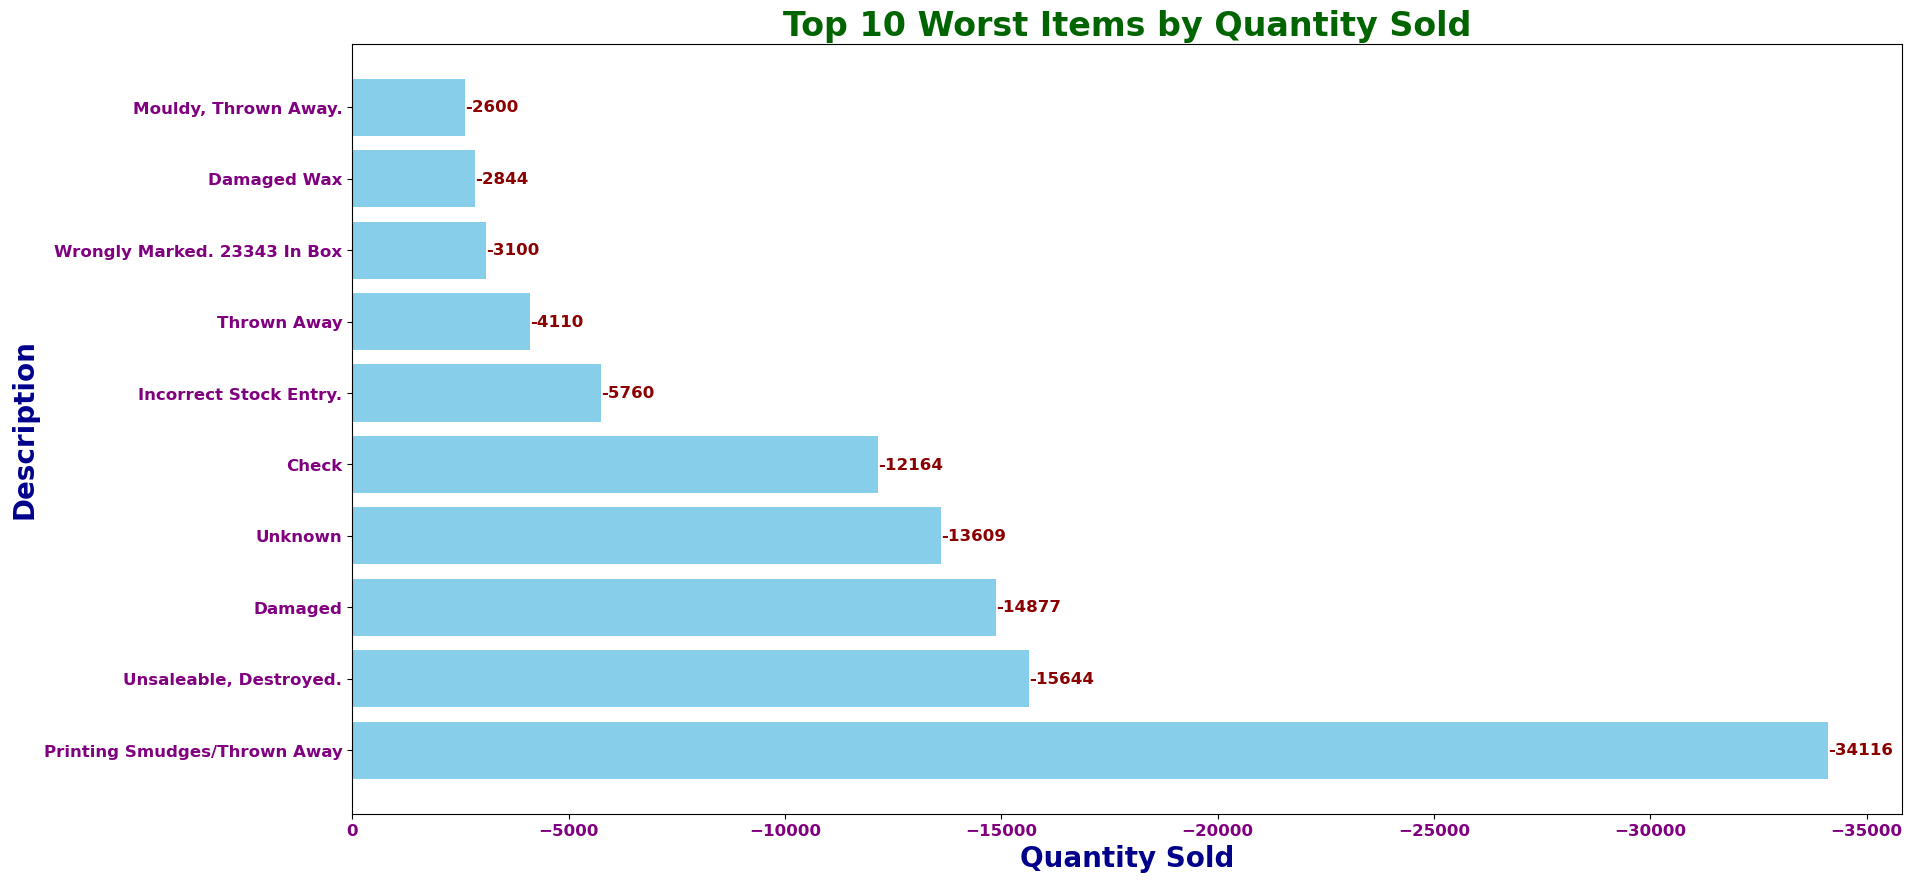

In [17]:
plt.figure(figsize=(20, 10))
bars = plt.barh(worst_items['Description'], worst_items['Quantity'], color='skyblue')

plt.xlabel('Quantity Sold', fontsize=20, fontweight='bold', color='darkblue')
plt.ylabel('Description', fontsize=20, fontweight='bold', color='darkblue')
plt.title('Top 10 Worst Items by Quantity Sold', fontsize=24, fontweight='bold', color='darkgreen')

plt.xticks(fontsize=12, fontweight='bold', color='purple')

plt.yticks(fontsize=12, fontweight='bold', color='purple')


plt.gca().invert_xaxis()

for bar in bars:
    yval = bar.get_width()
    plt.text(yval, bar.get_y() + bar.get_height()/2.0, int(yval), va='center', ha='left', fontsize=12, fontweight='bold', color='darkred')

plt.show()

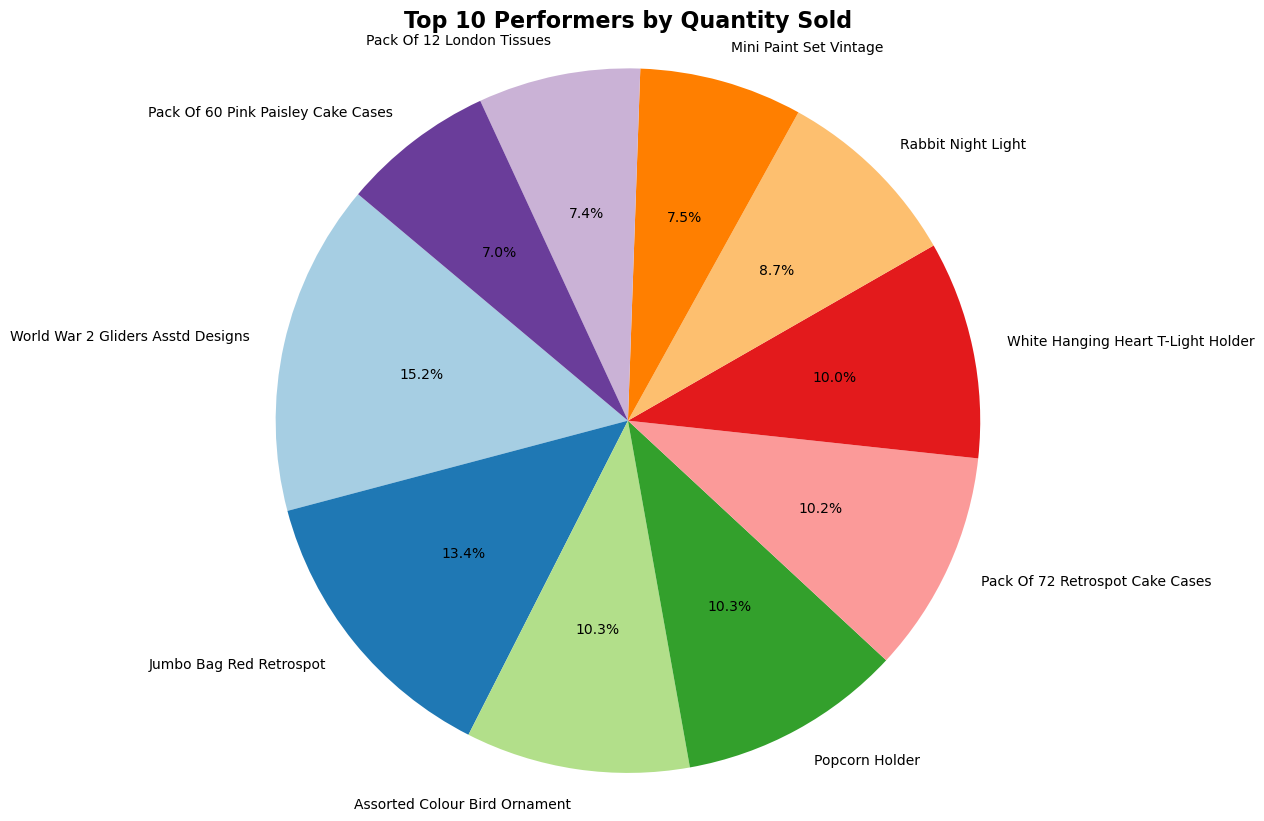

In [18]:
labels = top_items['Description']
sizes = top_items['Quantity']

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Performers by Quantity Sold', fontsize=16, fontweight='bold')
plt.axis('equal') 
plt.show()

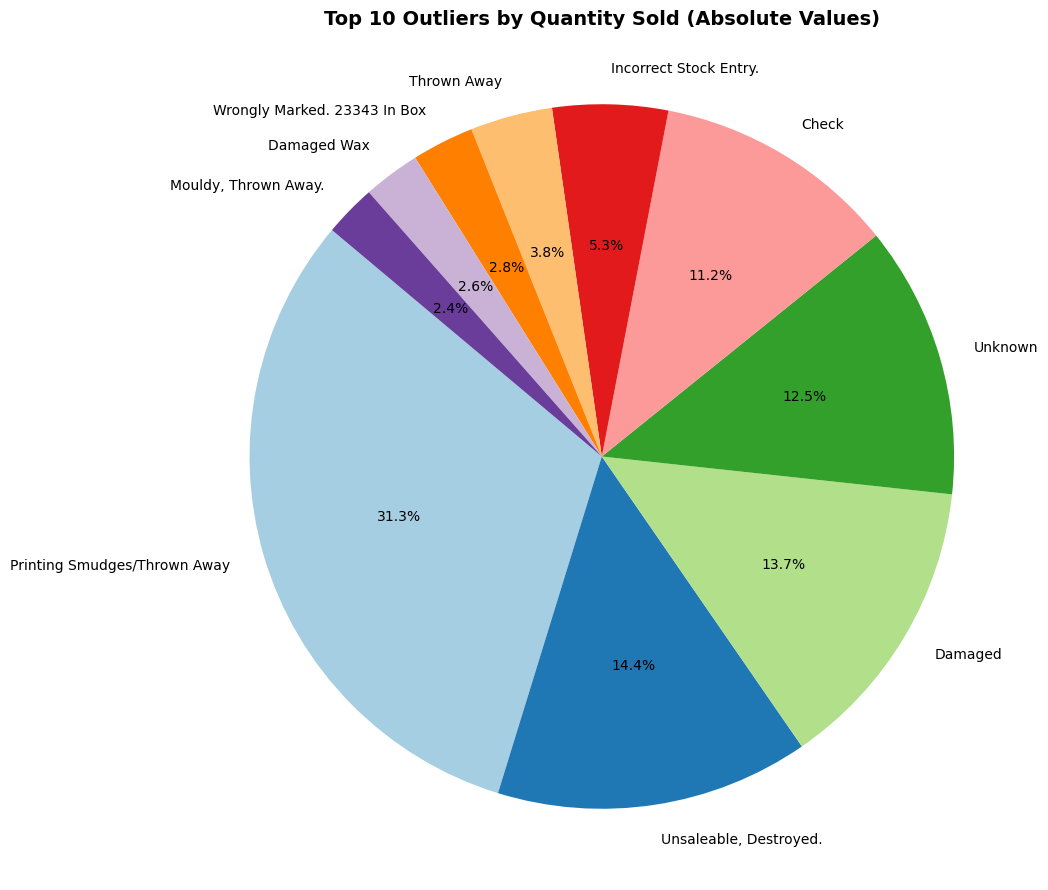

In [19]:
labels = worst_items['Description']
sizes = worst_items['Quantity'].abs()

plt.figure(figsize=(10, 11))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Outliers by Quantity Sold (Absolute Values)', fontsize=14, fontweight='bold')
plt.axis('equal') 
plt.show()